In [1]:
import Pkg

In [32]:
using Plots,Random,CurveFit,GaussianProcesses

In [3]:
n=100 # length of read
l=1e7/n # no. of reads
l=Int64(l) # length of genome: 1e7
x=rand(1:1e7,l);  # Using random the starting positions of reads of length 100 are simulated and stored in an array

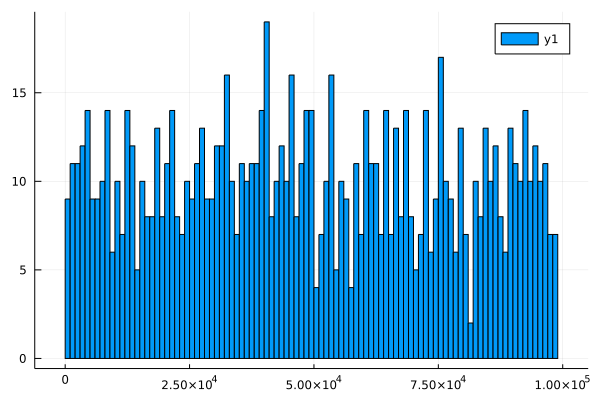

In [4]:
histogram(x,bins=1:1000:1e5)

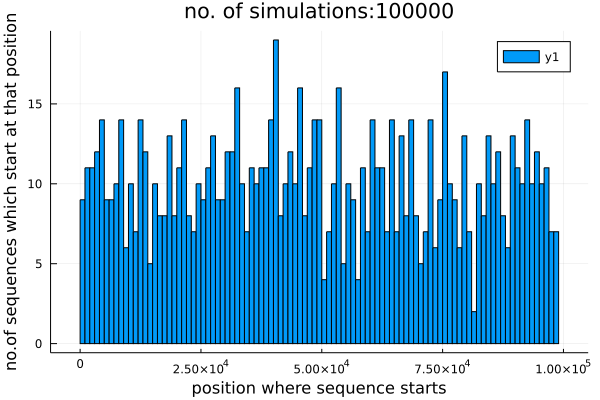

In [5]:
histogram(x,bins=1:1000:1e5)
xlabel!("position where sequence starts")
ylabel!("no.of sequences which start at that position")
title!("no. of simulations:"*string(l))

### The algorithm for previous plots seems to be difficult for two coverages and above , so in the next algorithm we simulate the starting position of a read and add 1.0 to next 100 positions as well. so the final array which we obtain we will have no. of coverages above a particular location. The array will look like  [1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1] , by visual inspection for coverage 1 we have 2 regions of length 1 and 2. For coverage 2 the lengths will be 1 and 4. For coverage 3 the lengths will be 3 alone. The below code just finds the length of these regions and plots are plotted.

In [6]:
l=Int32(1e7)
n=100
s=Int32(4*l/n)
a=zeros(Int32,l)
for i in 1:s
    j=rand(1:l-100)
    a[j]+=1
    a[j+100] -= 1
end
# integrating the derivative array
for pos in 2:l
  a[pos]=a[pos]+a[pos-1]
end

In [7]:
plot(1:length(a),a)
title!("array of steps")
xlabel!("various positions on genome")
ylabel!("no. of reads on top of that particular location")

single function to calculate all lengths for various overlaps

In [7]:
function heights(a)
    length_dist = Dict{Int, Vector{Int}}()
    d=1
    h=a[1]
    for i in 2:l
      if a[i]==h
          d+=1
      else
          if d>0
              push!(get!(length_dist, h, Int[]), d)
          d=1
          h=a[i]
          end
      end
    end
  return length_dist
  end

heights (generic function with 1 method)

In [8]:
heights(a)

Dict{Int64, Vector{Int64}} with 18 entries:
  5  => [3, 2, 16, 3, 2, 6, 2, 5, 8, 2  …  5, 5, 24, 43, 6, 2, 2, 25, 2, 7]
  16 => [5, 2, 9, 3]
  12 => [2, 4, 7, 1, 1, 15, 1, 4, 1, 11  …  2, 1, 4, 1, 18, 12, 1, 13, 4, 8]
  8  => [1, 16, 2, 17, 2, 22, 15, 1, 1, 1  …  5, 1, 1, 3, 6, 1, 14, 17, 8, 20]
  17 => [14]
  1  => [6, 38, 14, 24, 9, 14, 26, 4, 15, 24  …  34, 11, 29, 23, 8, 6, 6, 20, 1…
  0  => [5, 41, 13, 33, 9, 4, 20, 96, 24, 34  …  46, 33, 12, 92, 2, 13, 29, 2, …
  6  => [5, 17, 27, 13, 18, 20, 13, 30, 1, 17  …  18, 6, 9, 9, 1, 49, 2, 1, 4, …
  11 => [1, 30, 5, 2, 1, 37, 24, 21, 2, 6  …  4, 3, 6, 21, 10, 14, 10, 2, 1, 23]
  9  => [6, 2, 1, 3, 3, 1, 5, 3, 2, 30  …  17, 1, 18, 9, 3, 20, 3, 4, 5, 15]
  14 => [1, 1, 2, 13, 21, 3, 6, 3, 11, 3  …  27, 10, 2, 10, 6, 3, 5, 3, 11, 8]
  3  => [42, 6, 33, 12, 14, 9, 16, 20, 29, 2  …  35, 12, 3, 7, 5, 8, 18, 14, 11…
  7  => [17, 3, 30, 1, 13, 2, 4, 34, 2, 5  …  18, 14, 8, 6, 2, 3, 3, 1, 6, 5]
  4  => [30, 14, 18, 13, 21, 6, 2, 5, 15, 2  …  7, 

In [9]:
h=heights(a);

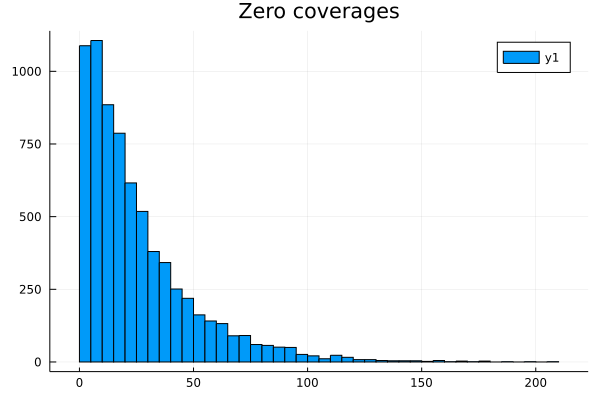

In [10]:
histogram(h[0],title="Zero coverages")

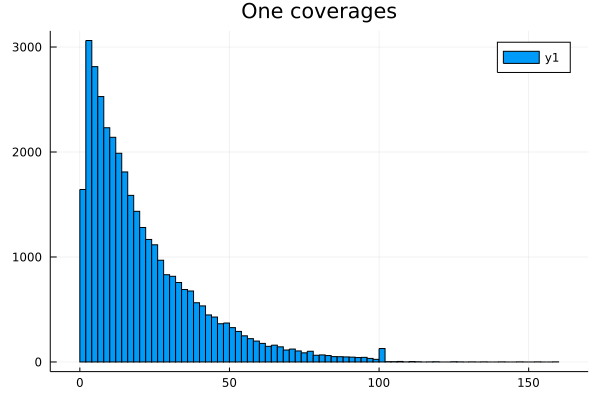

In [11]:
histogram(h[1],title="One coverages")

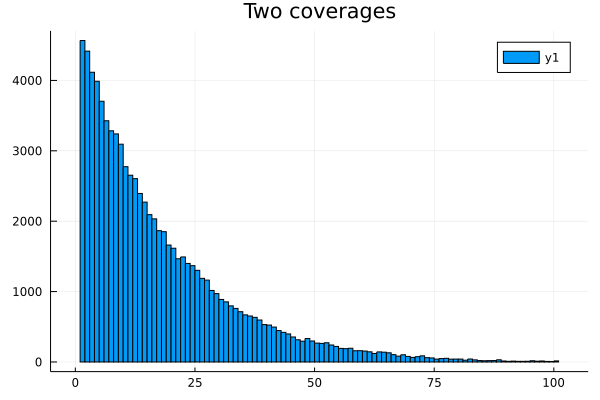

In [12]:
histogram(h[2],title="Two coverages")

In [13]:
h0=fill(0.0,maximum(h[0]))
for i in h[0]
    h0[i]+=1
end
h1=fill(0.0,maximum(h[1]))
for i in h[1]
    h1[i]+=1
end
h2=fill(0.0,maximum(h[2]))
for i in h[2]
    h2[i]+=1
end

In [14]:
x0=Float64[i for i in 1:maximum(h[0])]
x1=Float64[i for i in 1:maximum(h[1])]
x2=Float64[i for i in 1:maximum(h[2])]
print("")

In [15]:
fit0=curve_fit(LinearFit,log.(x0),h0)
y0=fit0.(log.(x0))
fit1=curve_fit(LinearFit,log.(x1),h1)
y1=fit1.(log.(x1))
fit2=curve_fit(LinearFit,log.(x2),h2)
y2=fit2.(log.(x2))
print("")

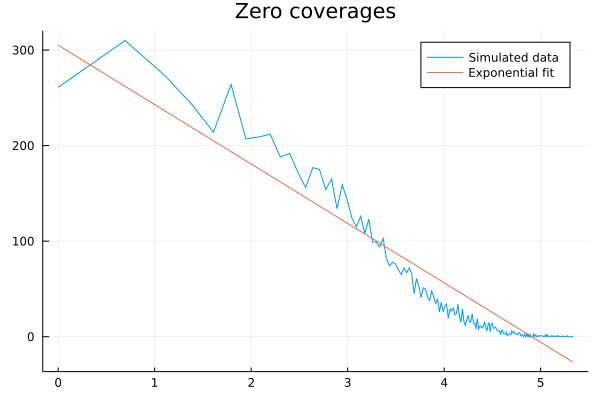

In [16]:
plot(log.(x0),h0,label="Simulated data")
plot!(log.(x0),y0,label="Exponential fit")
title!("Zero coverages")

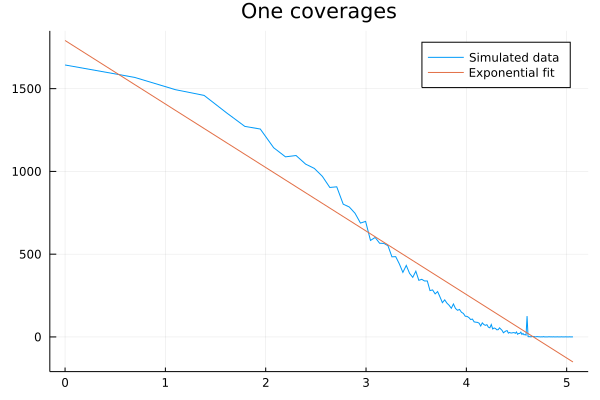

In [17]:
plot(log.(x1),h1,label="Simulated data")
plot!(log.(x1),y1,label="Exponential fit")
title!("One coverages")

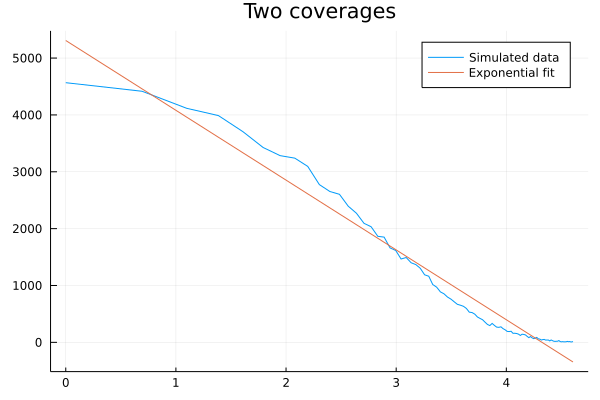

In [18]:
plot(log.(x2),h2,label="Simulated data")
plot!(log.(x2),y2,label="Exponential fit")
title!("Two coverages")

In [27]:
se = SE(0.0, 0.0)
m = MeanZero()
gp1=GP(x1, y1,m,se)
gp2=GP(x2, y2,m,se)
gp0=GP(x0, y0,m,se);

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /home/dinesh/.julia/packages/Plots/lzHOt/src/pipeline.jl:26


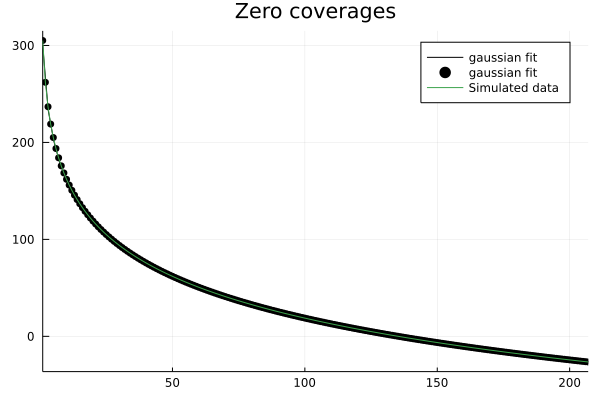

In [30]:
plot(gp0,label="gaussian fit")
plot!(x0,y0,label="Simulated data")
title!("Zero coverages")

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /home/dinesh/.julia/packages/Plots/lzHOt/src/pipeline.jl:26


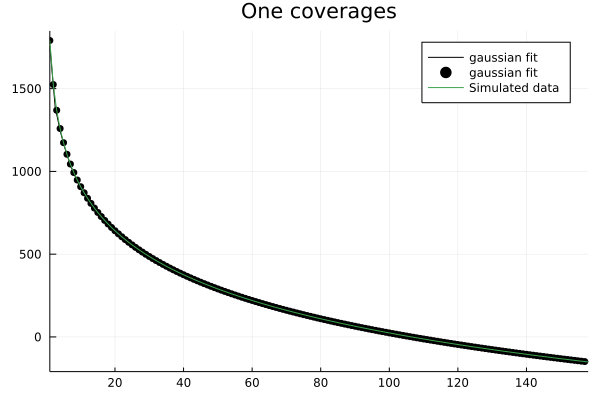

In [29]:
plot(gp1,label="gaussian fit")
plot!(x1,y1,label="Simulated data")
title!("One coverages")

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /home/dinesh/.julia/packages/Plots/lzHOt/src/pipeline.jl:26


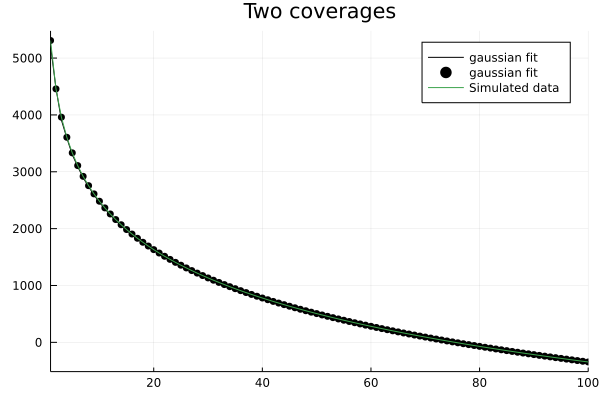

In [31]:
plot(gp2,label="gaussian fit")
plot!(x2,y2,label="Simulated data")
title!("Two coverages")